# Prep S&P 500 Minute-Resolution Stock Data

- Downloading data from http://www.kibot.com/ 

    - Downloads up-to-date IVE S&P 500 1-min aggregate data from 
http://www.kibot.com/free_historical_data.aspx



In [1]:
import requests
import pandas as pd
import datetime as dt
import glob,time,os
from IPython.display import display
import os

## Set filename and create folder (if needed)
temp_fpath = "raw_sp500_ive_min_tick_bidask.csv"
final_fpath = "../Data/stocks/sp500_ive_min_tick_bidask.csv"
os.makedirs(os.path.dirname(final_fpath), exist_ok=True)

In [2]:
## Download the raw data using requests package
agg_url = 'http://api.kibot.com/?action=history&symbol=IVE&interval=tickbidask1&bp=1&user=guest'
response = requests.get(agg_url,
                        allow_redirects=True)

## Save output to csv file
with open(temp_fpath,'wb') as file:
    file.write(response.content)
    
print(f"[i] Raw data (without headers) saved as {temp_fpath}. Saving csv.gz next...")


## Load in Stock Data Frame with headers (then save)
headers = ['Date','Time','BidOpen','BidHigh','BidLow','BidClose','AskOpen','AskHigh','AskLow','AskClose']
stock_df = pd.read_csv(temp_fpath, names=headers)
stock_df

[i] Raw data (without headers) saved as temp_raw_sp500_ive_min_tick_bidask.csv. Saving csv.gz next...


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,09/28/2009,09:30,37.51,37.51,37.51,37.51,37.57,37.57,37.57,37.57
1,09/28/2009,09:31,37.54,37.54,37.52,37.54,37.55,37.55,37.54,37.55
2,09/28/2009,09:32,37.55,37.59,37.55,37.59,37.57,37.60,37.57,37.60
3,09/28/2009,09:33,37.58,37.58,37.58,37.58,37.59,37.60,37.59,37.59
4,09/28/2009,09:34,37.58,37.58,37.57,37.57,37.59,37.59,37.58,37.58
...,...,...,...,...,...,...,...,...,...,...
1112723,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
1112724,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
1112725,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47
1112726,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50


In [ ]:
## saving full csv
stock_df.to_csv(temp_fpath,index=False)

In [3]:
stock_df = pd.read_csv(temp_fpath)
stock_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,09/28/2009,09:30,37.51,37.51,37.51,37.51,37.57,37.57,37.57,37.57
1,09/28/2009,09:31,37.54,37.54,37.52,37.54,37.55,37.55,37.54,37.55
2,09/28/2009,09:32,37.55,37.59,37.55,37.59,37.57,37.60,37.57,37.60
3,09/28/2009,09:33,37.58,37.58,37.58,37.58,37.59,37.60,37.59,37.59
4,09/28/2009,09:34,37.58,37.58,37.57,37.57,37.59,37.59,37.58,37.58
...,...,...,...,...,...,...,...,...,...,...
1112723,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
1112724,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
1112725,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47
1112726,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50


## Filtering Data for Class

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112728 entries, 0 to 1112727
Data columns (total 10 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Date      1112728 non-null  object 
 1   Time      1112728 non-null  object 
 2   BidOpen   1112728 non-null  float64
 3   BidHigh   1112728 non-null  float64
 4   BidLow    1112728 non-null  float64
 5   BidClose  1112728 non-null  float64
 6   AskOpen   1112728 non-null  float64
 7   AskHigh   1112728 non-null  float64
 8   AskLow    1112728 non-null  float64
 9   AskClose  1112728 non-null  float64
dtypes: float64(8), object(2)
memory usage: 84.9+ MB


In [7]:
# selecting test row to determine format
test = stock_df.iloc[0]
test_str = test['Date'] + " " + test['Time']
test_str

'09/28/2009 09:30'

In [8]:
# Testing format code
fmt = "%m/%d/%Y %H:%M"
pd.to_datetime(test_str).strftime(fmt)

'09/28/2009 09:30'

In [9]:
## Make Combined Date Time column and Drop Origs
stock_df['datetime'] = pd.to_datetime(stock_df['Date']+' '+stock_df['Time'],
                                      format = fmt, infer_datetime_format=False)
stock_df.head()

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,datetime
0,09/28/2009,09:30,37.51,37.51,37.51,37.51,37.57,37.57,37.57,37.57,2009-09-28 09:30:00
1,09/28/2009,09:31,37.54,37.54,37.52,37.54,37.55,37.55,37.54,37.55,2009-09-28 09:31:00
2,09/28/2009,09:32,37.55,37.59,37.55,37.59,37.57,37.60,37.57,37.60,2009-09-28 09:32:00
3,09/28/2009,09:33,37.58,37.58,37.58,37.58,37.59,37.60,37.59,37.59,2009-09-28 09:33:00
4,09/28/2009,09:34,37.58,37.58,37.57,37.57,37.59,37.59,37.58,37.58,2009-09-28 09:34:00


In [10]:
stock_df = stock_df.set_index('datetime')
stock_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2009-09-28 09:30:00,09/28/2009,09:30,37.51,37.51,37.51,37.51,37.57,37.57,37.57,37.57
2009-09-28 09:31:00,09/28/2009,09:31,37.54,37.54,37.52,37.54,37.55,37.55,37.54,37.55
2009-09-28 09:32:00,09/28/2009,09:32,37.55,37.59,37.55,37.59,37.57,37.60,37.57,37.60
2009-09-28 09:33:00,09/28/2009,09:33,37.58,37.58,37.58,37.58,37.59,37.60,37.59,37.59
2009-09-28 09:34:00,09/28/2009,09:34,37.58,37.58,37.57,37.57,37.59,37.59,37.58,37.58
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 15:56:00,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
2023-01-27 15:57:00,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
2023-01-27 15:58:00,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47


<AxesSubplot: xlabel='datetime'>

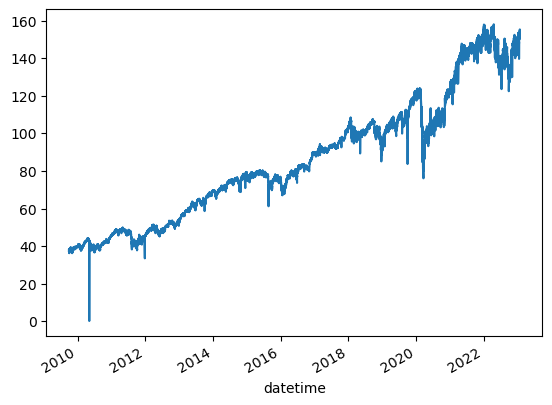

In [11]:
stock_df['BidClose'].plot()

#### Only Keeping....2018+

In [12]:
final_df = stock_df.loc['2018':]
final_df

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
datetime,,,,,,,,,,
2018-01-02 09:29:00,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
2018-01-02 09:30:00,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2018-01-02 09:31:00,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
2018-01-02 09:32:00,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
2018-01-02 09:33:00,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52
...,...,...,...,...,...,...,...,...,...,...
2023-01-27 15:56:00,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
2023-01-27 15:57:00,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
2023-01-27 15:58:00,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47


[i] Saving final file as ../Data/stocks/sp500_ive_min_tick_bidask.csv


In [15]:
## Saving final file
print(f'[i] Saving final file as {final_fpath}')
final_df.to_csv(final_fpath,index=False)

[i] Saving final file as ../Data/stocks/sp500_ive_min_tick_bidask.csv


In [16]:
pd.read_csv(final_fpath)

,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
0,01/02/2018,09:29,102.33,102.33,102.33,102.33,102.67,102.67,102.67,102.67
1,01/02/2018,09:30,102.56,102.56,102.50,102.52,102.75,102.75,102.53,102.53
2,01/02/2018,09:31,102.51,102.54,102.51,102.53,102.54,102.57,102.54,102.55
3,01/02/2018,09:32,102.58,102.58,102.58,102.58,102.59,102.59,102.59,102.59
4,01/02/2018,09:33,102.58,102.58,102.51,102.51,102.59,102.59,102.52,102.52
...,...,...,...,...,...,...,...,...,...,...
445757,01/27/2023,15:56,154.51,154.53,154.45,154.48,154.53,154.54,154.47,154.49
445758,01/27/2023,15:57,154.48,154.51,154.44,154.44,154.49,154.52,154.45,154.45
445759,01/27/2023,15:58,154.44,154.48,154.43,154.46,154.45,154.49,154.44,154.47
445760,01/27/2023,15:59,154.47,154.49,154.41,154.47,154.48,154.50,154.44,154.50
